# Tujuan

Mengidentifikasi Fitur Penting dalam Prediksi Kematian Pasien Gagal Jantung:
- Melakukan analisis fitur untuk menentukan faktor-faktor utama yang berkontribusi terhadap kematian pasien gagal jantung.
- Menjelaskan metode yang digunakan untuk memilih dan mengevaluasi fitur penting dalam dataset.

Membandingkan Metode Prediksi: Random Forest dan Bagging:
- Menjelaskan cara kerja algoritma Random Forest dan teknik Bagging dalam konteks prediksi medis.
- Membandingkan kinerja kedua model berdasarkan metrik evaluasi utama seperti akurasi dan AUC.

Evaluasi Kinerja Model untuk Pengambilan Keputusan:
- Menyajikan hasil akurasi dan AUC dari model Random Forest dan Bagging.
- Memberikan rekomendasi berdasarkan hasil evaluasi untuk meningkatkan keputusan klinis dalam pengelolaan pasien gagal jantung.

Link Dataset: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records


# Import Libraries

In [89]:
# Import standar Python libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import scikit-learn utilities and pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Import scikit-learn models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Import scikit-learn model selection and metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Load and Inspect Data

Dataset ini berisi rekam medis 299 pasien gagal jantung, yang dikumpulkan selama masa tindak lanjut, dimana setiap profil pasien memiliki 13 gambaran klinis

| Feature | Explanation | Measurement Range |
|---|---|---|
| Age | Age of the patient | Years | [40, ..., 95] |
| Anaemia | Decrease of red blood cells or hemoglobin | Boolean | 0, 1 |
| High Blood Pressure | If patient has hypertension | Boolean | 0, 1 |
| Creatininephosphokinase (CPK) | Level of the CPK enzyme in the blood | mcg/L | [23, ..., 7861] |
| Diabetes | If the patient has diabetes | Boolean | 0, 1 |
| Ejection Fraction | Percentage of blood leaving the heart at each contraction | Percentage | [14, ..., 80] |
| Sex | Woman or man | Binary | 0, 1 |
| Platelets | Platelets in the blood | kiloplatelets/mL | [25.01, ..., 850.00] |
| Serum Creatinine | Level of creatinine in the blood | mg/dL | [0.50, ..., 9.40] |
| Serum Sodium | Level of sodium in the blood | mEq/L | [114, ..., 148] |
| Smoking | If the patient smokes | Boolean | 0, 1 |
| Time | Follow-up period | Days | [4, ..., 285] |
| Target (Death Event) | If the patient died during the follow-up period | Boolean | 0, 1 |


Catatan untuk fitur categorical :
- anaemia: (0 -> tidak, 1 -> Iya)
- diabetes: if the patient has diabetes (0 -> tidak, 1-> Iya)
- high blood pressure: if the patient has hypertension (0 -> tidak, 1-> Iya)
- sex: woman or man (0 -> woman, 1-> man)
- smoking: if the patient smokes or not (0 -> tidak, 1 -> Iya)
- [target] death event: if the patient died during the follow-up period (0 -> tidak meninggal, 1 -> meninggal)


In [90]:
dataframe = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [91]:
dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [92]:
dataframe.shape

(299, 13)

In [93]:
dataframe.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [94]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [95]:
categorical_variables = dataframe[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = dataframe[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]



## Cek Missing Value

In [96]:
pd.set_option('display.max_rows', 300)
dataframe.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [97]:
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [98]:
dataframe['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Exploratory Data Analysis (EDA) (Simple)

## Visualisasi dan analisis pada Fitur Numerikal/Continous fitur

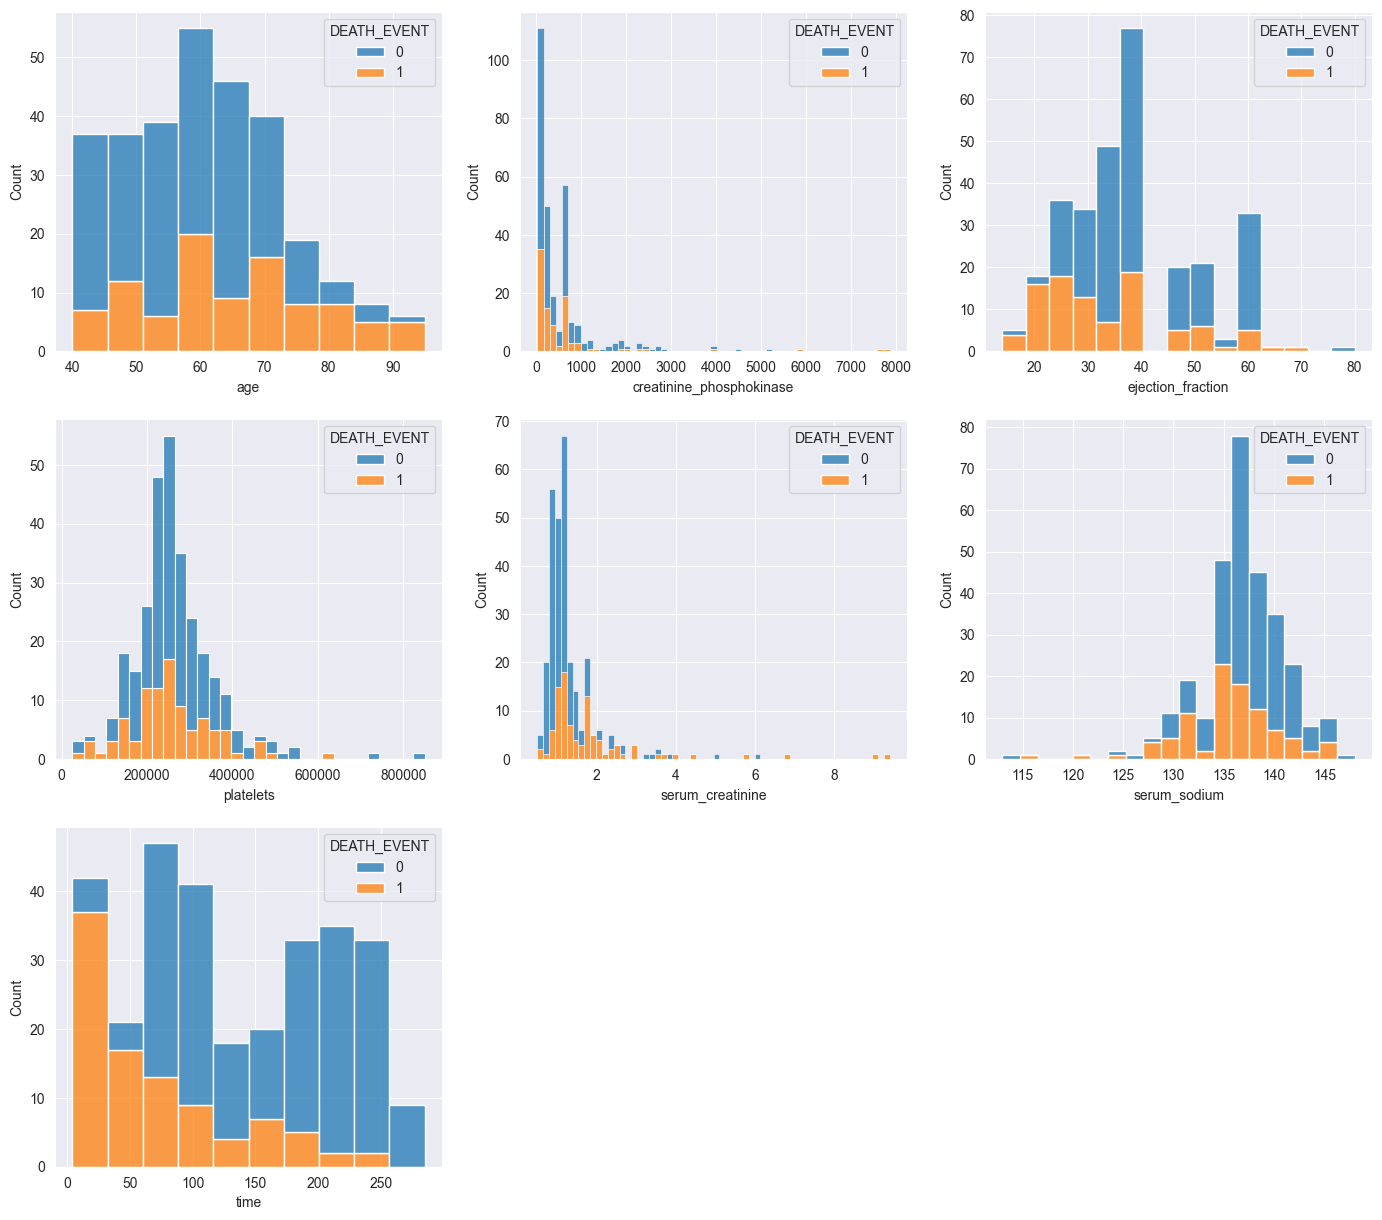

In [99]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_variables):
    plt.subplot(3,3,j+1)
    sns.histplot(data = dataframe, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

## Seleksi Fitur Kontinu/Numerikal Menggunakan Corelation Matrix

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_20156\3530416768.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



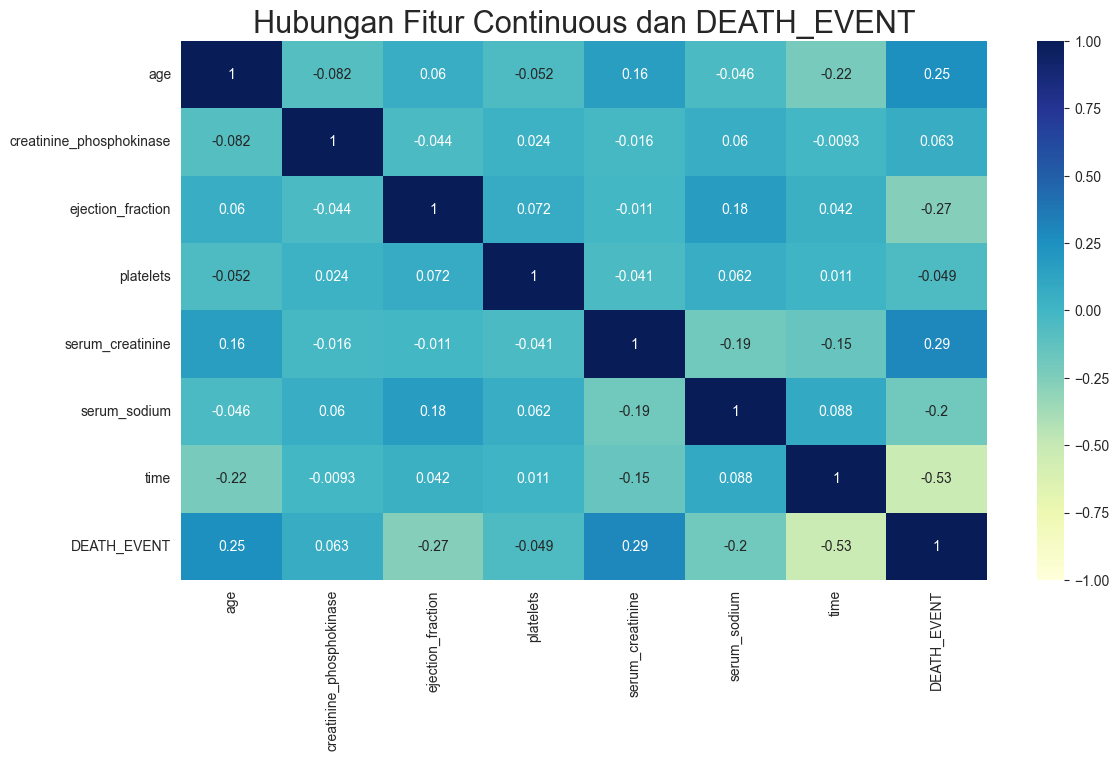

In [69]:
continuous_variables['DEATH_EVENT'] = dataframe['DEATH_EVENT']
correlation_matrix = continuous_variables.corr()

plt.figure(figsize=(13,7))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Hubungan Fitur Continuous dan DEATH_EVENT", fontsize = 22)
plt.show()

In [21]:
death_event_corr = correlation_matrix['DEATH_EVENT'].drop('DEATH_EVENT').sort_values(ascending=True)

In [22]:
death_event_corr

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
creatinine_phosphokinase    0.062728
age                         0.253729
serum_creatinine            0.294278
Name: DEATH_EVENT, dtype: float64

Fitur Kontinu yang Dipilih:
- time (-0.526964)
- serum_creatinine (0.294278)
- age (0.253729)
- ejection_fraction (-0.268603)

Alasan Pemilihan:
1. time (-0.526964)
- Korelasi Negatif Kuat: Korelasi negatif kuat menunjukkan bahwa semakin lama waktu yang berlalu sejak diagnosis, semakin kecil kemungkinan terjadinya DEATH_EVENT.
Signifikansi: Waktu sejak diagnosis merupakan faktor penting yang dapat memberikan informasi tentang prognosis pasien.

2. serum_creatinine (0.294278)

- Korelasi Positif Sedang: Korelasi positif sedang menunjukkan bahwa kadar kreatinin serum yang lebih tinggi terkait dengan peningkatan risiko kematian.
Signifikansi: Serum kreatinin adalah indikator fungsi ginjal, dan fungsi ginjal yang buruk merupakan faktor risiko signifikan untuk kematian.

3. age (0.253729)

- Korelasi Positif Sedang: Korelasi positif sedang menunjukkan bahwa usia yang lebih tua sedikit terkait dengan peningkatan risiko kematian.
Signifikansi: Usia adalah faktor risiko yang diketahui untuk banyak kondisi medis serius, termasuk kematian.

4. ejection_fraction (-0.268603)

- Korelasi Negatif Sedang: Korelasi negatif sedang menunjukkan bahwa pasien dengan fraksi ejeksi yang lebih tinggi (kemampuan jantung untuk memompa darah) cenderung memiliki risiko kematian yang lebih rendah.
- Signifikansi: Fraksi ejeksi adalah indikator penting dari fungsi jantung, yang merupakan faktor kunci dalam banyak kondisi kardiovaskular.

## Visualisasi Fitur Kategorikal Terhadap Target

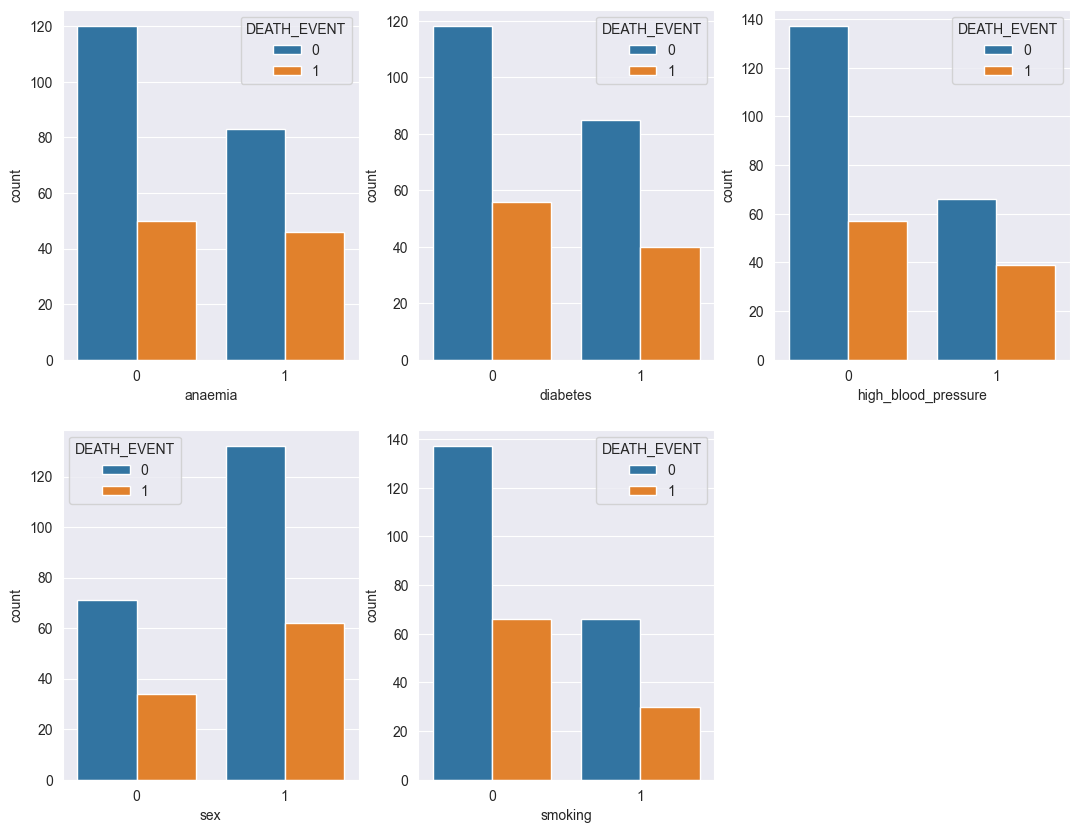

In [52]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_variables):
    plt.subplot(2,3,i+1)
    sns.countplot(data = dataframe, x= cat, hue = "DEATH_EVENT")
plt.show()

In [63]:
import pandas as pd
import plotly.graph_objs as go

def plot_pie_chart(dataframe, feature, target='DEATH_EVENT'):
    # Memisahkan data berdasarkan fitur kategorikal dan target
    feature_yes = dataframe[dataframe[feature] == 1]
    feature_no = dataframe[dataframe[feature] == 0]
    
    feature_yes_survived = feature_yes[feature_yes[target] == 0]
    feature_yes_not_survived = feature_yes[feature_yes[target] == 1]
    feature_no_survived = feature_no[feature_no[target] == 0]
    feature_no_not_survived = feature_no[feature_no[target] == 1]
    
    # Menghitung nilai untuk pie chart
    labels = [
        f'{feature.replace("_", " ").title()} Yes - Survived',
        f'{feature.replace("_", " ").title()} Yes - Not Survived',
        f'{feature.replace("_", " ").title()} No - Survived',
        f'{feature.replace("_", " ").title()} No - Not Survived'
    ]
    values = [
        len(feature_yes_survived),
        len(feature_yes_not_survived),
        len(feature_no_survived),
        len(feature_no_not_survived)
    ]
    
    # Membuat pie chart menggunakan Plotly
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
    fig.update_layout(
        title_text=f"Analysis on Survival - {feature.replace('_', ' ').title()}"
    )
    fig.show()

In [64]:
plot_pie_chart(dataframe, 'anaemia')

In [65]:
plot_pie_chart(dataframe, 'diabetes')

In [66]:
plot_pie_chart(dataframe, 'high_blood_pressure')

In [68]:
plot_pie_chart(dataframe, 'smoking')

## Seleksi Fitur Kategorikal Menggunakan Chi2

In [18]:
from sklearn.feature_selection import chi2

target = dataframe['DEATH_EVENT']

# Hitung Chi-Square
chi_scores, p_values = chi2(categorical_variables, target)

# Buat DataFrame untuk menampilkan hasil
chi2_scores_df = pd.DataFrame({'Feature': categorical_variables.columns, 'Chi2 Score': chi_scores, 'P-Value': p_values})

# Tampilkan hasilnya
print("Hasil Chi-Square Test:")
print(chi2_scores_df.sort_values(by='P-Value'))

selected_categorical_features = chi2_scores_df[chi2_scores_df['P-Value'] < 0.05]['Feature'].tolist()
print("Fitur kategorikal yang dipilih:")
print(selected_categorical_features)


Hasil Chi-Square Test:
               Feature  Chi2 Score   P-Value
2  high_blood_pressure    1.221539  0.269059
0              anaemia    0.746593  0.387557
4              smoking    0.032347  0.857269
3                  sex    0.001956  0.964721
1             diabetes    0.000657  0.979554
Fitur kategorikal yang dipilih:
[]


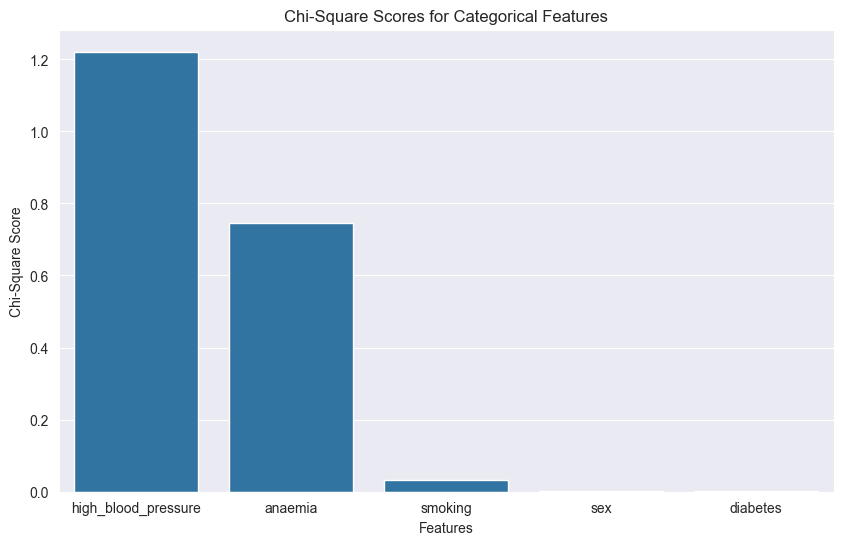

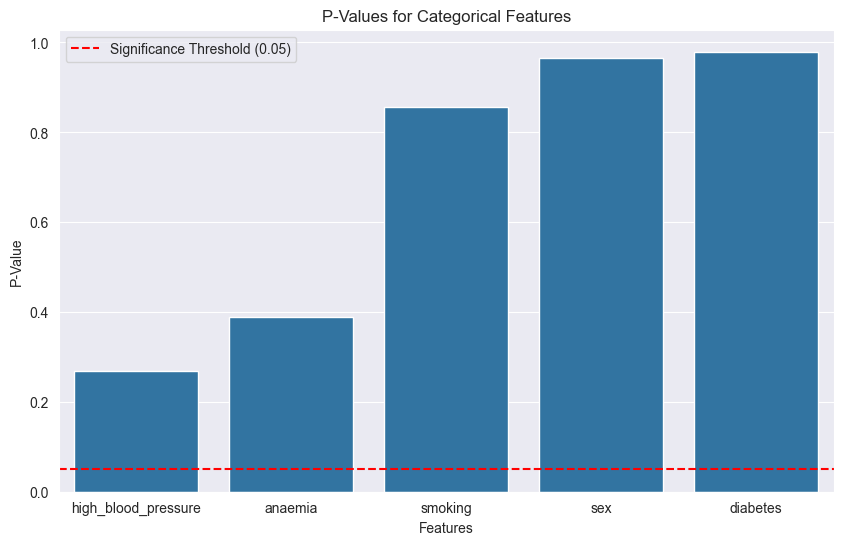

In [24]:
# Plot Chi-Square Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Chi2 Score', data=chi2_scores_df.sort_values(by='Chi2 Score', ascending=False))
plt.title('Chi-Square Scores for Categorical Features')
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.show()

# Plot P-Values
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='P-Value', data=chi2_scores_df.sort_values(by='P-Value'))
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-Values for Categorical Features')
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.legend()
plt.show()

Hasil Chi-Square Test :
- high_blood_pressure (P-Value: 0.269059): Tidak signifikan.
- anaemia (P-Value: 0.387557): Tidak signifikan.
- smoking (P-Value: 0.857269): Tidak signifikan.
- sex (P-Value: 0.964721): Tidak signifikan.
- diabetes (P-Value: 0.979554): Tidak signifikan.

Berdasarkan hasil uji chi-square, tampaknya tidak ada fitur kategorikal yang memiliki p-value di bawah 0.05. Ini menunjukkan bahwa tidak ada hubungan signifikan antara fitur-fitur kategorikal yang diuji (high_blood_pressure, anaemia, smoking, sex, dan diabetes) dengan variabel target DEATH_EVENT pada tingkat signifikansi 5%.

## Mengetahui Fitur Penting Menggunakan Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur dan target
X = dataframe.drop('DEATH_EVENT', axis=1)
y = dataframe['DEATH_EVENT']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Lihat pentingnya fitur
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


                          Importance
time                        0.375186
serum_creatinine            0.155334
ejection_fraction           0.112341
creatinine_phosphokinase    0.082606
age                         0.078224
platelets                   0.075128
serum_sodium                0.064939
anaemia                     0.015220
smoking                     0.011217
high_blood_pressure         0.010240
diabetes                    0.009785
sex                         0.009780


# Data Preprocessing

## Pemisahan Fitur dan Target

In [27]:
X = dataframe[["age","ejection_fraction","serum_creatinine","time"]]
y = dataframe["DEATH_EVENT"]

## Split dataset menjadi test dan train

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Standarisasi Data

In [29]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler ke data training dan transformasi data training
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data testing menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Modeling

## pipelines untuk Bagging dan Random Forest

| Metode                                | Deskripsi                                                  |
|---------------------------------------|------------------------------------------------------------|
| Random Forest                         | Algoritma ensemble yang menggunakan banyak pohon keputusan untuk prediksi. |
| Bagging dengan Decision Tree          | Metode bagging yang menggunakan pohon keputusan sebagai estimator dasar. |
| Bagging dengan KNN                    | Metode bagging yang menggunakan K-Nearest Neighbors sebagai estimator dasar. |
| Bagging dengan Naive Bayes            | Metode bagging yang menggunakan Naive Bayes sebagai estimator dasar. |


In [30]:
# Define the pipelines for Bagging with different estimators
bagging_dt_pipeline = Pipeline([
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42))
])

bagging_knn_pipeline = Pipeline([
    ('bagging', BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42))
])

bagging_nb_pipeline = Pipeline([
    ('bagging', BaggingClassifier(estimator=GaussianNB(), random_state=42))
])

# Define the pipeline for Random Forest
rf_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV for each pipeline
bagging_dt_param_grid = {
    'bagging__n_estimators': [50, 100, 150],
    'bagging__estimator__max_depth': [None, 10, 20, 30],
}

bagging_knn_param_grid = {
    'bagging__n_estimators': [50, 100, 150],
    'bagging__estimator__n_neighbors': [3, 5, 7],
}

bagging_nb_param_grid = {
    'bagging__n_estimators': [50, 100, 150],
}

rf_param_grid = {
    'random_forest__n_estimators': [50, 100, 150],
    'random_forest__max_depth': [None, 10, 20, 30],
}


## GridSearchCV untuk bagging dengan decision tree pipeline

In [31]:
grid_search_dt = GridSearchCV(bagging_dt_pipeline, bagging_dt_param_grid, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bagging',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'bagging__estimator__max_depth': [None, 10, 20, 30],
                         'bagging__n_estimators': [50, 100, 150]})

## GridSearchCV for the bagging with KNN pipeline

In [32]:
grid_search_knn = GridSearchCV(bagging_knn_pipeline, bagging_knn_param_grid, cv=5,  n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bagging',
                                        BaggingClassifier(estimator=KNeighborsClassifier(),
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'bagging__estimator__n_neighbors': [3, 5, 7],
                         'bagging__n_estimators': [50, 100, 150]})

## GridSearchCV untuk bagging dengan Naive Bayes pipeline

In [33]:
grid_search_nb = GridSearchCV(bagging_nb_pipeline, bagging_nb_param_grid, cv=5, n_jobs=-1)
grid_search_nb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bagging',
                                        BaggingClassifier(estimator=GaussianNB(),
                                                          random_state=42))]),
             n_jobs=-1, param_grid={'bagging__n_estimators': [50, 100, 150]})

## GridSearchCV untuk Random Forest

In [34]:
# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('random_forest',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'random_forest__max_depth': [None, 10, 20, 30],
                         'random_forest__n_estimators': [50, 100, 150]})

# Model Evaluation

In [35]:
# Evaluate the best models
best_bagging_dt_model = grid_search_dt.best_estimator_
best_bagging_knn_model = grid_search_knn.best_estimator_
best_bagging_nb_model = grid_search_nb.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

y_pred_bagging_dt = best_bagging_dt_model.predict(X_test_scaled)
y_pred_bagging_knn = best_bagging_knn_model.predict(X_test_scaled)
y_pred_bagging_nb = best_bagging_nb_model.predict(X_test_scaled)
y_pred_rf = best_rf_model.predict(X_test_scaled)

bagging_dt_accuracy = round(accuracy_score(y_test, y_pred_bagging_dt) * 100, 2)
bagging_knn_accuracy = round(accuracy_score(y_test, y_pred_bagging_knn) * 100, 2)
bagging_nb_accuracy = round(accuracy_score(y_test, y_pred_bagging_nb) * 100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

print(f'Best Bagging Decision Tree Model Accuracy: {bagging_dt_accuracy}%')
print(f'Best Bagging KNN Model Accuracy: {bagging_knn_accuracy}%')
print(f'Best Bagging Naive Bayes Model Accuracy: {bagging_nb_accuracy}%')
print(f'Best Random Forest Model Accuracy: {rf_accuracy}%')

Best Bagging Decision Tree Model Accuracy: 85.56%
Best Bagging KNN Model Accuracy: 88.89%
Best Bagging Naive Bayes Model Accuracy: 86.67%
Best Random Forest Model Accuracy: 85.56%


In [36]:
print("\nClassification Report for Bagging Decision Tree:")
print(classification_report(y_test, y_pred_bagging_dt))


Classification Report for Bagging Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.70      0.79      0.75        24

    accuracy                           0.86        90
   macro avg       0.81      0.84      0.82        90
weighted avg       0.86      0.86      0.86        90


In [37]:
print("\nClassification Report for Bagging KNN:")
print(classification_report(y_test, y_pred_bagging_knn))


Classification Report for Bagging KNN:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.77      0.83      0.80        24

    accuracy                           0.89        90
   macro avg       0.85      0.87      0.86        90
weighted avg       0.89      0.89      0.89        90


In [38]:
print("\nClassification Report for Bagging Naive Bayes:")
print(classification_report(y_test, y_pred_bagging_nb))


Classification Report for Bagging Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        66
           1       0.80      0.67      0.73        24

    accuracy                           0.87        90
   macro avg       0.84      0.80      0.82        90
weighted avg       0.86      0.87      0.86        90


In [39]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.70      0.79      0.75        24

    accuracy                           0.86        90
   macro avg       0.81      0.84      0.82        90
weighted avg       0.86      0.86      0.86        90


In [40]:
accuracy_list = [] 
accuracy_list.append(bagging_dt_accuracy)
accuracy_list.append(bagging_knn_accuracy)
accuracy_list.append(bagging_nb_accuracy)
accuracy_list.append(rf_accuracy)

In [41]:
models = ["Bagging Decision Tree", "Bagging KNN", "Bagging Naive Bayes", "Random Forest"]

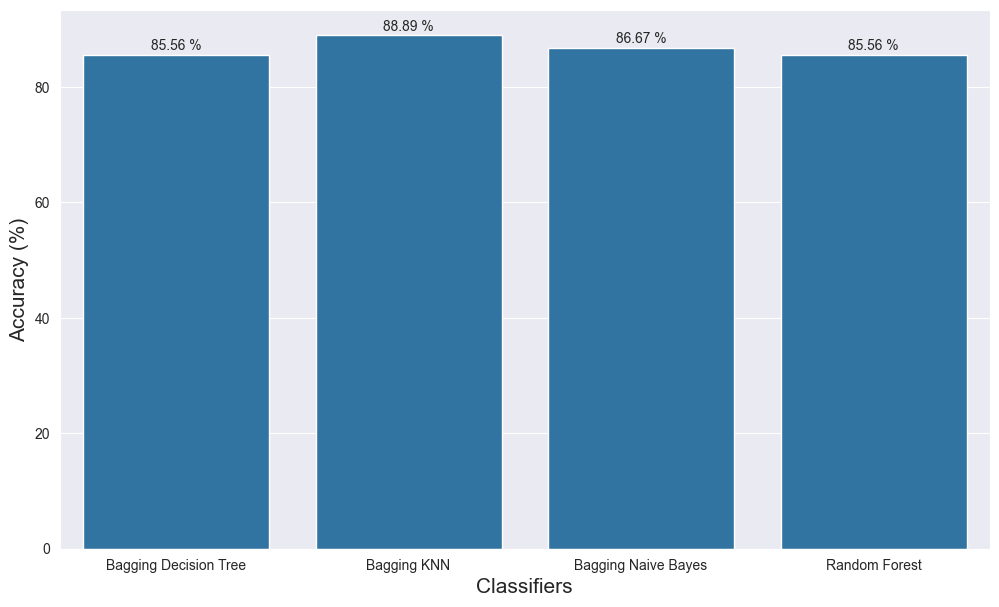

In [42]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

Akurasi:
Bagging KNN memiliki akurasi tertinggi (88.89%).
Bagging Naive Bayes memiliki akurasi sedikit lebih rendah (86.67%).
Bagging Decision Tree dan Random Forest memiliki akurasi yang sama (85.56%).

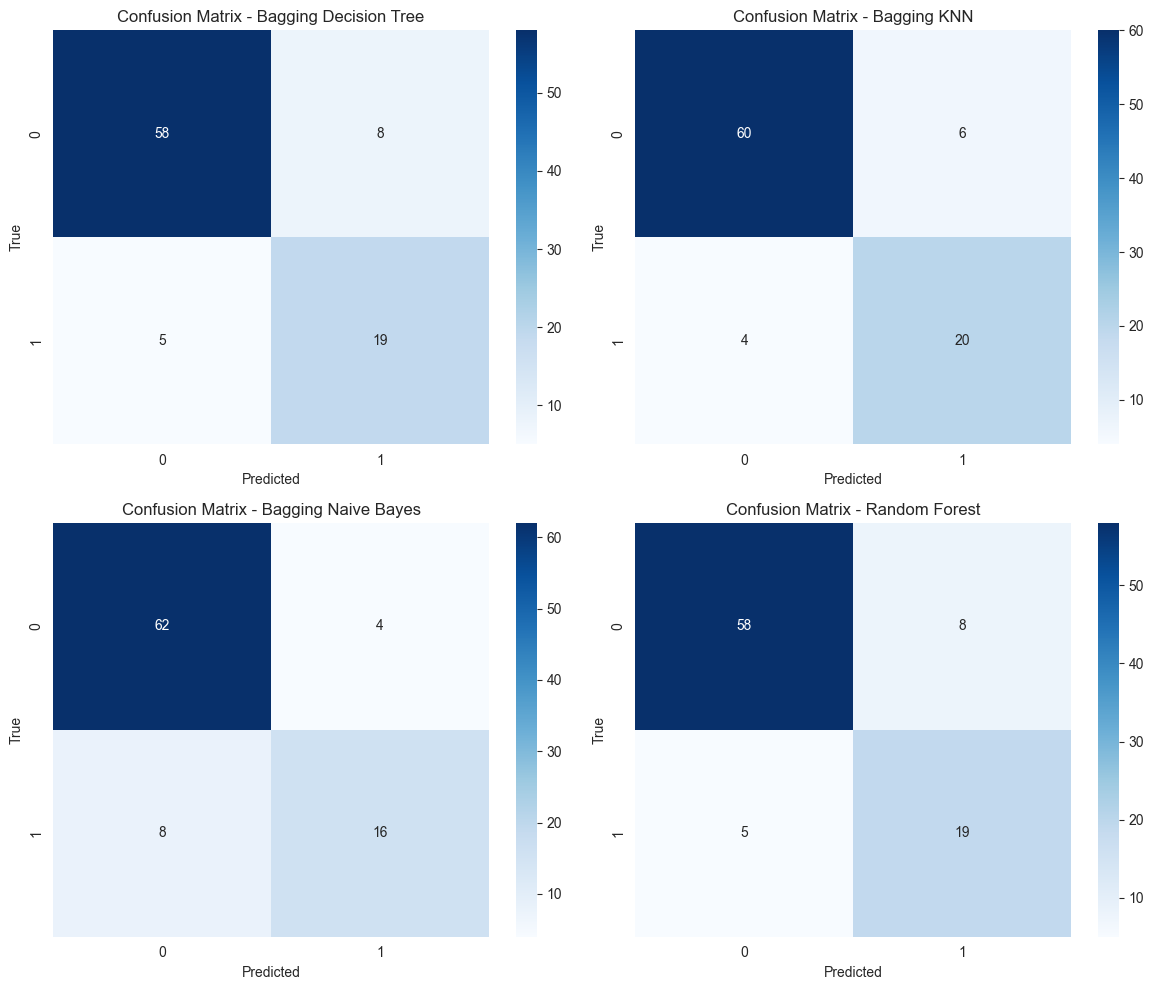

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrices
conf_matrix_bagging_dt = confusion_matrix(y_test, y_pred_bagging_dt)
conf_matrix_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)
conf_matrix_bagging_nb = confusion_matrix(y_test, y_pred_bagging_nb)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot confusion matrix for Bagging Decision Tree
sns.heatmap(conf_matrix_bagging_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Bagging Decision Tree')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

# Plot confusion matrix for Bagging KNN
sns.heatmap(conf_matrix_bagging_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - Bagging KNN')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

# Plot confusion matrix for Bagging Naive Bayes
sns.heatmap(conf_matrix_bagging_nb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - Bagging Naive Bayes')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

# Plot confusion matrix for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Random Forest')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')

# Adjust layout
plt.tight_layout()
plt.show()


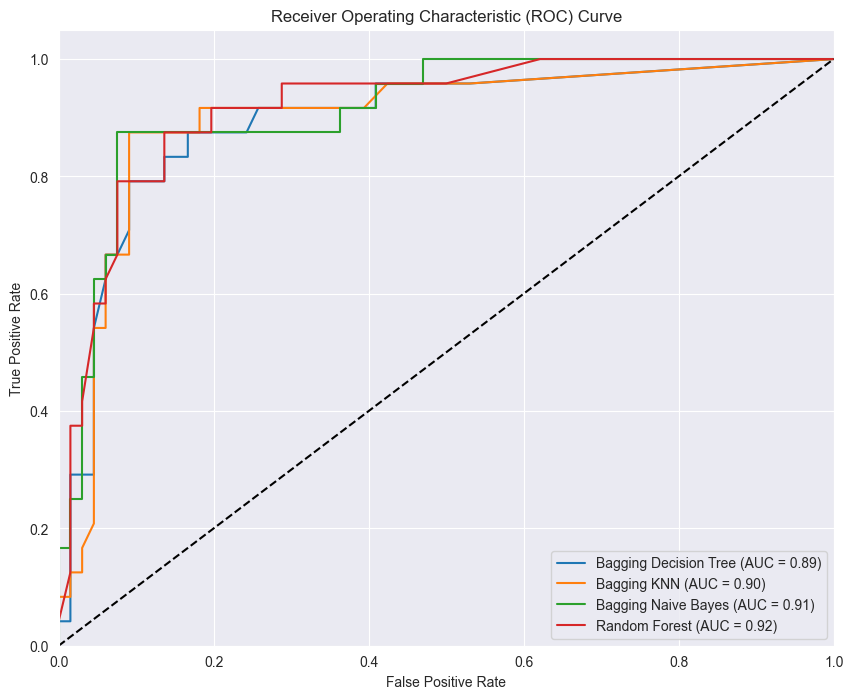

In [44]:
from sklearn.metrics import roc_curve, auc

# Fungsi untuk membuat ROC Curve dan menghitung AUC
def plot_roc_curve(model, X_test, y_test, ax, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Mengambil probabilitas kelas positif
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

# Membuat plot ROC Curve
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC Curve untuk setiap model
plot_roc_curve(best_bagging_dt_model, X_test_scaled, y_test, ax, 'Bagging Decision Tree')
plot_roc_curve(best_bagging_knn_model, X_test_scaled, y_test, ax, 'Bagging KNN')
plot_roc_curve(best_bagging_nb_model, X_test_scaled, y_test, ax, 'Bagging Naive Bayes')
plot_roc_curve(best_rf_model, X_test_scaled, y_test, ax, 'Random Forest')

# Menambahkan garis diagonal untuk referensi
ax.plot([0, 1], [0, 1], 'k--')

# Mengatur batas dan label plot
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')

# Menampilkan plot
plt.show()

# Kesimpulan

Kesimpulan dan Rekomendasi untuk dataset ini:
- Model dengan AUC tertinggi (Random Forest, AUC = 0.912) menunjukkan bahwa model ini memiliki kemampuan terbaik dalam membedakan antara kelas positif dan negatif. AUC adalah metrik yang sangat penting karena memberikan gambaran komprehensif tentang kinerja model di berbagai threshold.
- Model dengan Akurasi tertinggi (Bagging KNN, 88.89%) menunjukkan bahwa model ini memiliki persentase prediksi benar tertinggi dalam keseluruhan prediksi.

Rekomendasi:
- Jika kita lebih mengutamakan kemampuan model untuk membedakan antara kelas positif dan negatif, yang biasanya lebih penting dalam banyak aplikasi praktis, maka Random Forest adalah pilihan terbaik karena memiliki AUC tertinggi (0.912).
- Jika kita lebih mengutamakan persentase prediksi yang benar secara keseluruhan, maka Bagging KNN adalah pilihan terbaik karena memiliki akurasi tertinggi (88.89%).
